In [12]:
import pandas as pd
import matplotlib.pyplot as plt

In [13]:
# Load the dataset
file_path = r"C:\Users\71591\Desktop\dataset\News_Category_Dataset_v3.json"
df = pd.read_json(file_path, lines=True)


In [14]:
df

,link,headline,category,short_description,authors,date
0,https://www.huffpost.com/entry/covid-boosters-...,Over 4 Million Americans Roll Up Sleeves For O...,U.S. NEWS,Health experts said it is too early to predict...,"Carla K. Johnson, AP",2022-09-23
1,https://www.huffpost.com/entry/american-airlin...,"American Airlines Flyer Charged, Banned For Li...",U.S. NEWS,He was subdued by passengers and crew when he ...,Mary Papenfuss,2022-09-23
2,https://www.huffpost.com/entry/funniest-tweets...,23 Of The Funniest Tweets About Cats And Dogs ...,COMEDY,"""Until you have a dog you don't understand wha...",Elyse Wanshel,2022-09-23
3,https://www.huffpost.com/entry/funniest-parent...,The Funniest Tweets From Parents This Week (Se...,PARENTING,"""Accidentally put grown-up toothpaste on my to...",Caroline Bologna,2022-09-23
4,https://www.huffpost.com/entry/amy-cooper-lose...,Woman Who Called Cops On Black Bird-Watcher Lo...,U.S. NEWS,Amy Cooper accused investment firm Franklin Te...,Nina Golgowski,2022-09-22
...,...,...,...,...,...,...
209522,https://www.huffingtonpost.com/entry/rim-ceo-t...,RIM CEO Thorsten Heins' 'Significant' Plans Fo...,TECH,Verizon Wireless and AT&T are already promotin...,"Reuters, Reuters",2012-01-28
209523,https://www.huffingtonpost.com/entry/maria-sha...,Maria Sharapova Stunned By Victoria Azarenka I...,SPORTS,"Afterward, Azarenka, more effusive with the pr...",,2012-01-28
209524,https://www.huffingtonpost.com/entry/super-bow...,"Giants Over Patriots, Jets Over Colts Among M...",SPORTS,"Leading up to Super Bowl XLVI, the most talked...",,2012-01-28
209525,https://www.huffingtonpost.com/entry/aldon-smi...,Aldon Smith Arrested: 49ers Linebacker Busted ...,SPORTS,CORRECTION: An earlier version of this story i...,,2012-01-28


In [15]:
# Display the value counts of each category
category_counts = df['category'].value_counts()

# Keep only the top 10 categories
top_10_categories = category_counts.index[:10]
df_top_classes = df[df['category'].isin(top_10_categories)]

print("Top 10 categories and their counts:")
print(df_top_classes['category'].value_counts())

Top 10 categories and their counts:
category
POLITICS          35602
WELLNESS          17945
ENTERTAINMENT     17362
TRAVEL             9900
STYLE & BEAUTY     9814
PARENTING          8791
HEALTHY LIVING     6694
QUEER VOICES       6347
FOOD & DRINK       6340
BUSINESS           5992
Name: count, dtype: int64


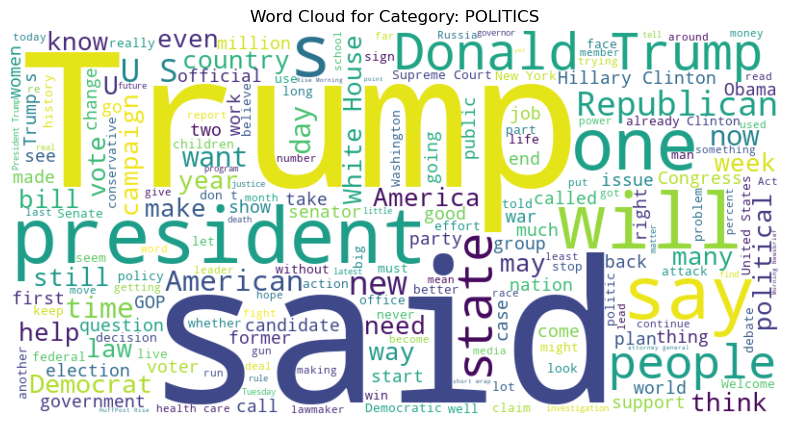

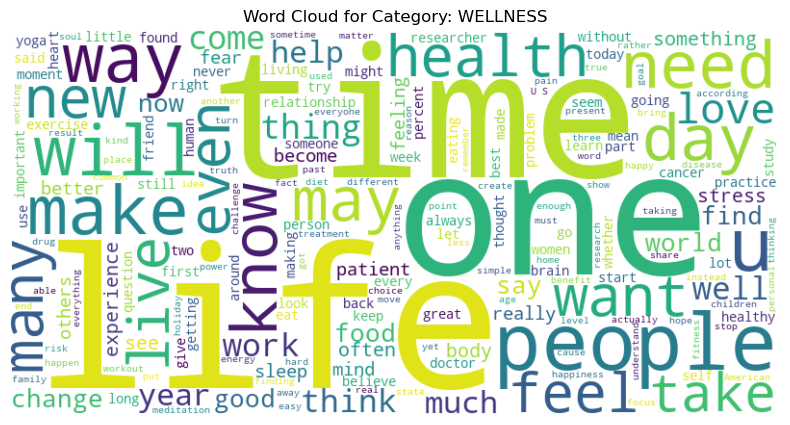

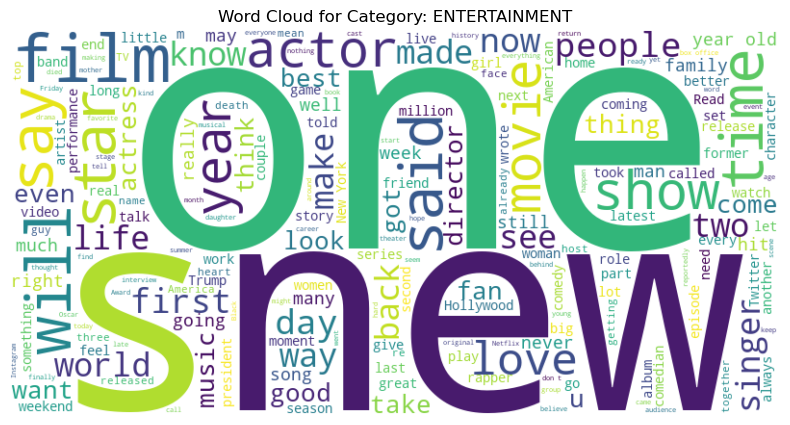

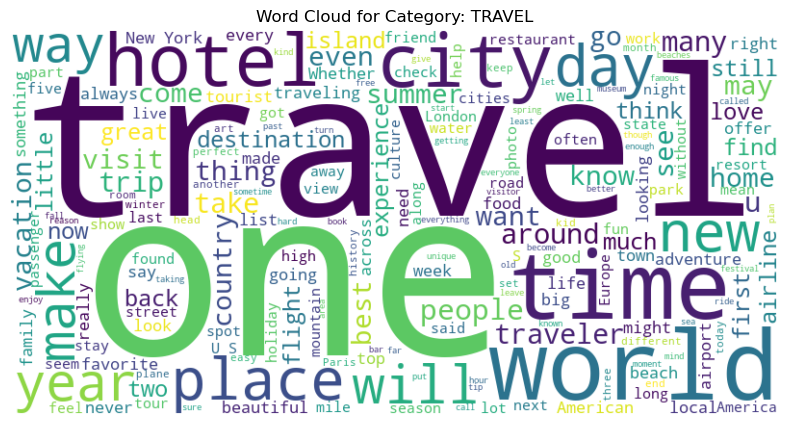

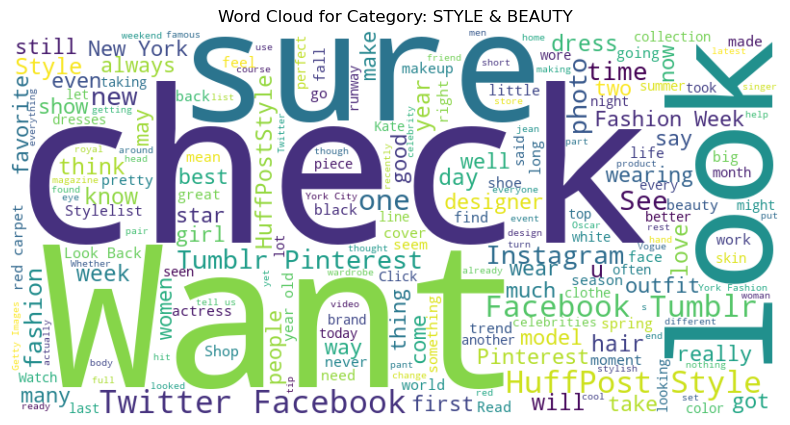

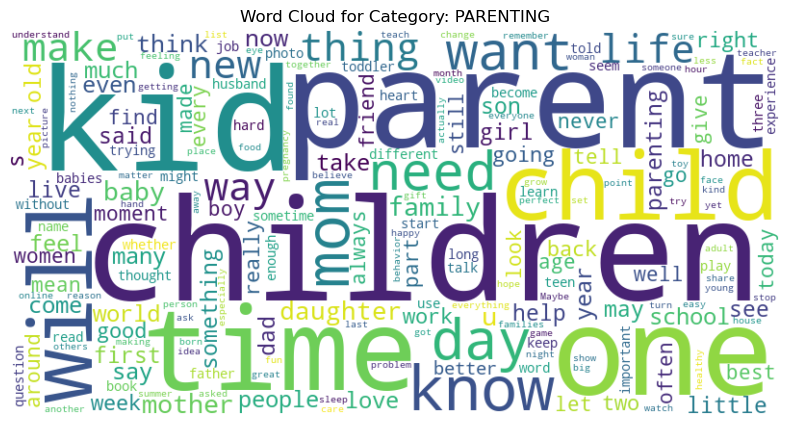

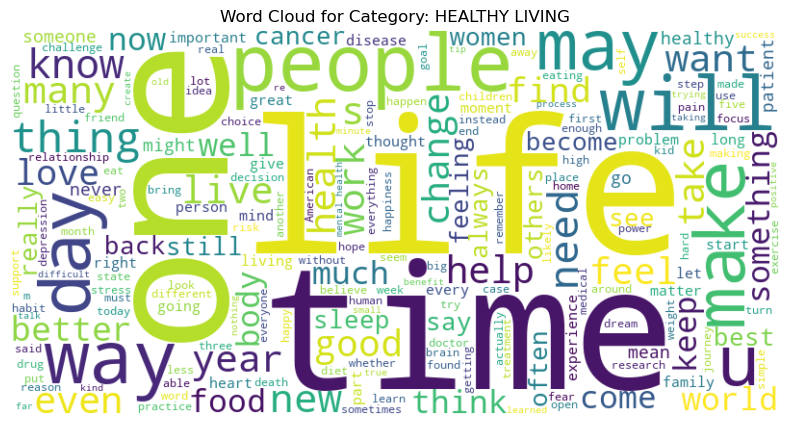

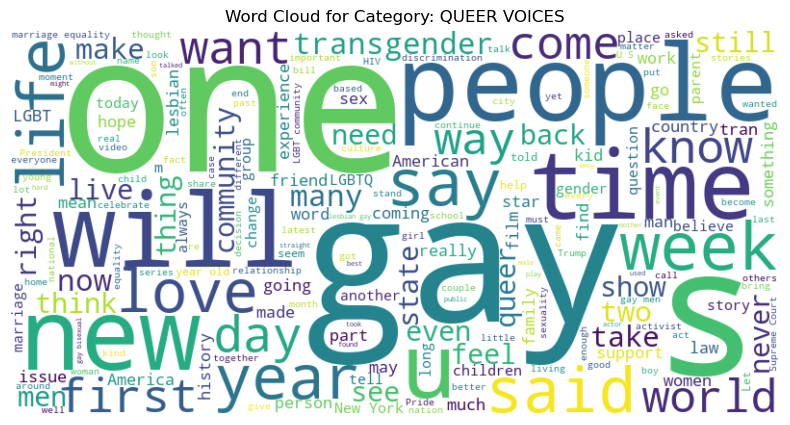

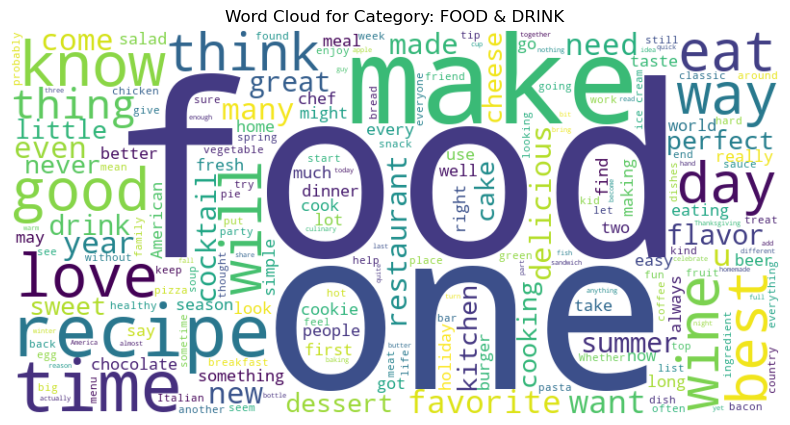

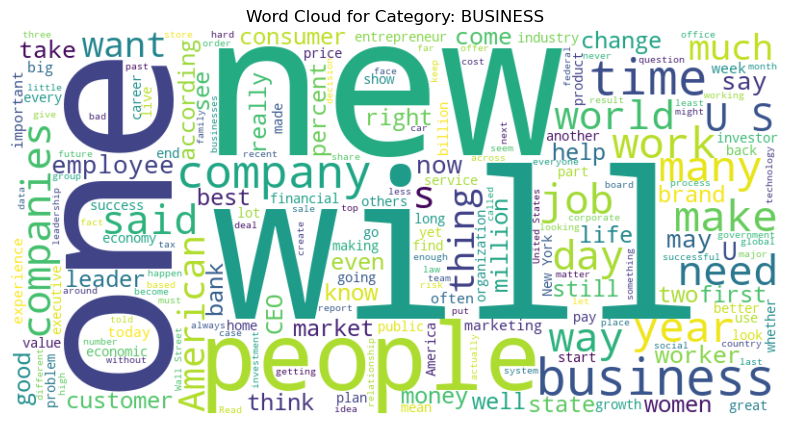

In [16]:
from wordcloud import WordCloud

# Function to generate word cloud for a given category
def generate_wordcloud(text, category):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f"Word Cloud for Category: {category}")
    plt.show()

# Iterate through each of the top 10 categories and generate word clouds
for category in top_10_categories:
    text = " ".join(desc for desc in df_top_classes[df_top_classes['category'] == category]['short_description'].dropna())
    generate_wordcloud(text, category)


 Create a Dictionary for Each Category

In [17]:
# Create a dictionary for each category
class_dict = df_top_classes.groupby('category')['short_description'].apply(lambda x: " ".join(x.dropna())).to_dict()

# Print the dictionary keys to verify
print("Categories in the dictionary:", class_dict.keys())

# Print a sample of the dictionary for verification
for category, text in list(class_dict.items())[:2]:  # Adjust the number of items to display as needed
    print(f"\nCategory: {category}\nText sample: {text[:500]}...\n")  # Print the first 500 characters of the text sample


Categories in the dictionary: dict_keys(['BUSINESS', 'ENTERTAINMENT', 'FOOD & DRINK', 'HEALTHY LIVING', 'PARENTING', 'POLITICS', 'QUEER VOICES', 'STYLE & BEAUTY', 'TRAVEL', 'WELLNESS'])

Category: BUSINESS
Text sample: They follow in the footsteps of REI workers in New York City who formed a union earlier this year. Delaware Chancery Judge Kathaleen McCormick dealt the world's richest person a setback in ordering a speedy trial on his abandoned deal to buy Twitter. Starbucks' move follows McDonald's exit from the Russian market last week. Cryptocurrency trading platform Coinbase has lost half its value in the past week. At 3.6%, unemployment nearly reached the lowest level in half a century. Recent statements ...


Category: ENTERTAINMENT
Text sample: For the past 18 months, Hollywood has effectively boycotted the Globes after reports that the HFPA’s 87 members of non-American journalists included no Black members. The "Avatar" director said aspects of his 2009 movie are "still competi

 Tokenize and Count Words 

In [24]:
from sklearn.feature_extraction.text import CountVectorizer 

# Initialize the CountVectorizer
vectorizer = CountVectorizer(stop_words='english') # CountVectorizer to convert the text data into word count vectors. 

#Each row represents a document and each column represents a word from the vocabulary.
#The value in each cell is the count of the word in the respective document.

# Transform all descriptions into word count vectors
X = vectorizer.fit_transform(df_top_classes['short_description'].dropna())

# Convert to DataFrame without converting to dense format
# Get feature names and create a dictionary mapping indices to words
feature_names = vectorizer.get_feature_names_out()
word_counts = pd.DataFrame.sparse.from_spmatrix(X, columns=feature_names)

# Add the category column to the word counts DataFrame
word_counts['category'] = df_top_classes['category'].values

print("Word counts DataFrame with categories:")
word_counts.head()


Word counts DataFrame with categories:


,00,000,0000,001,006,007,009,00am,00pm,00s,...,ˌlɪbəˈtɛːrɪəˌnɪz,глотка,глубокая,семья,আইভ,ಠ_ಠ,ﬁnd,ﬁrst,ﬁx,ﬂavors
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


count Words for Each Dictionary #word counts to predict the category for each article

In [19]:
from collections import Counter

# Count words for each category dictionary
category_word_counts = {}
for category, text in class_dict.items():
    words = text.split()
    word_count = Counter(words)
    category_word_counts[category] = word_count

print("Category word counts:")
for category, word_count in list(category_word_counts.items())[:2]:  # Display a sample
    print(f"\nCategory: {category}\nWord Count Sample: {dict(list(word_count.items())[:10])}\n")  # Show sample of 10 words


Category word counts:

Category: BUSINESS
Word Count Sample: {'They': 70, 'follow': 18, 'in': 2144, 'the': 6064, 'footsteps': 1, 'of': 3429, 'REI': 2, 'workers': 106, 'New': 119, 'York': 57}


Category: ENTERTAINMENT
Word Count Sample: {'For': 90, 'the': 9342, 'past': 63, '18': 11, 'months,': 8, 'Hollywood': 115, 'has': 869, 'effectively': 2, 'boycotted': 1, 'Globes': 12}



Assign Class Based on Word Counts

In [20]:
def predict_category(text, category_word_counts):
    words = text.split()
    word_count = Counter(words)
    category_scores = {}

    for category, cat_word_count in category_word_counts.items():
        score = sum(word_count[word] * cat_word_count[word] for word in word_count)
        category_scores[category] = score

    predicted_category = max(category_scores, key=category_scores.get)
    return predicted_category

# Apply prediction to each short_description
df_top_classes['predicted_category'] = df_top_classes['short_description'].apply(lambda x: predict_category(x, category_word_counts))

print("DataFrame with predicted categories:")
df_top_classes[['short_description', 'category', 'predicted_category']].head()


DataFrame with predicted categories:


C:\Users\71591\AppData\Local\Temp\ipykernel_32420\1214779021.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_top_classes['predicted_category'] = df_top_classes['short_description'].apply(lambda x: predict_category(x, category_word_counts))


,short_description,category,predicted_category
3,"""Accidentally put grown-up toothpaste on my to...",PARENTING,WELLNESS
20,"For the past 18 months, Hollywood has effectiv...",ENTERTAINMENT,POLITICS
21,President issues vow as tensions with China rise.,POLITICS,WELLNESS
24,An annual celebration took on a different feel...,POLITICS,POLITICS
28,"The ""Avatar"" director said aspects of his 2009...",ENTERTAINMENT,POLITICS


Calculate Accuracy

The classification process involves comparing the word counts in each document with precomputed word counts for each category. The category with the highest similarity (based on word counts) is assigned to the document. Finally, the accuracy is calculated by comparing these predicted categories with the actual categories in the dataset.

In [23]:
from sklearn.metrics import accuracy_score

# Calculate accuracy
accuracy = accuracy_score(df_top_classes['category'], df_top_classes['predicted_category'])
acc = (df_top_classes['category']== df_top_classes['predicted_category']).mean()
print(f"Accuracy: {accuracy:.4f}")
acc


Accuracy: 0.2986


0.29862886358354634